# Reflection


LLM 에이전트 구축의 맥락에서, 성찰(reflection)은 LLM이 자신의 과거 단계를 관찰하도록 하여(도구나 환경으로부터의 잠재적인 관찰과 함께) 선택된 행동의 질을 평가하는 과정을 말합니다. 이러한 과정은 재계획, 검색 또는 평가와 같은 작업에 사용됩니다.

<img src="./img/reflection.png" alt="Reflection" width="640"/>

이 노트북은 LangGraph에서 매우 간단한 형태의 성찰을 시연합니다.

#### Prerequisites

In [ ]:
!pip install -U --quiet  langgraph langchain-fireworks
!pip install -U --quiet tavily-python

In [1]:
import getpass
import os


def _set_env(var: str):
    if not os.environ.get(var):
        os.environ[var] = getpass.getpass(f"{var}: ")


_set_env("OPENAI_API_KEY")
_set_env("TAVILY_API_KEY")

## Generate

이 예시에서는 “5단락 에세이” 생성기를 만들 것입니다. 


In [2]:
from langchain_core.messages import AIMessage, BaseMessage, HumanMessage
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder
from langchain_openai import ChatOpenAI

prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            "당신은 훌륭한 5단락 에세이를 작성하는 임무를 맡은 에세이 보조자입니다. "
            "사용자의 요청에 대해 가능한 최고의 에세이를 작성하세요. "
            "사용자가 비평을 제공하면, 이전 시도의 수정된 버전으로 응답하세요. "
        ),
        MessagesPlaceholder(variable_name="messages"),
    ]
)
llm = ChatOpenAI(model="gpt-4o")
generate = prompt | llm

In [3]:
essay = ""
request = HumanMessage(
    content="AI가 인간의 일자리를 얼마만큼이나 위협할까에 대한 에세이를 작성하세요."
)
for chunk in generate.stream({"messages": [request]}):
    print(chunk.content, end="")
    essay += chunk.content

### AI가 인간의 일자리를 얼마만큼이나 위협할까?

인공지능(AI)의 발전은 우리의 삶에 여러 방면에서 긍정적인 변화를 가져왔지만, 동시에 수많은 사람들에게 일자리의 안정성에 대한 불안을 안겨주기도 한다. AI가 인간의 일자리를 얼마나 위협할 것인가는 현재와 미래의 사회적, 경제적 구조를 이해하는 데 중요한 질문이다. 이러한 질문에 대한 답변은 다각적인 분석을 필요로 하며, 기술 발전의 속도, 사회적 적응력, 그리고 정책적 대응에 따라 달라질 수 있다. 본 에세이는 AI가 인간의 일자리에 미치는 영향을 다섯 가지 주요 측면에서 분석한다.

첫째, AI의 자동화 능력은 단순하고 반복적인 작업을 대체할 가능성이 높다. 제조업, 물류, 그리고 서비스업에서 이미 많은 일자리가 자동화되고 있다. 예를 들어, 공장에서의 로봇 팔과 자율주행 트럭은 인간 노동자를 대체하고 있으며, 이는 생산성 향상과 비용 절감에 기여한다. 하지만 이러한 변화는 단순 노동자들에게 실직의 위기를 초래할 수 있다. 따라서 사회는 직업 교육과 재훈련 프로그램을 통해 이들의 재취업을 돕는 방안을 마련해야 한다.

둘째, 고급 지식 노동자들 역시 AI의 위협에서 자유롭지 않다. 의료 진단, 금융 분석, 법률 자문과 같은 분야에서 AI의 적용이 점차 확대되고 있다. 예를 들어, IBM의 왓슨(Watson)은 복잡한 의료 데이터를 분석하여 의사보다 더 정밀한 진단을 내릴 수 있는 능력을 갖추고 있다. 이는 전문가들의 업무 효율성을 높이는 동시에, 일부 전문직의 수요를 감소시킬 수 있다. 따라서 이러한 변화에 대비해 고급 인적 자원은 AI와 협력하는 새로운 업무 형태를 학습해야 한다.

셋째, AI는 새로운 일자리와 산업을 창출할 수 있는 잠재력을 가지고 있다. AI 기술 개발, 유지보수, 그리고 윤리적 문제 해결과 같은 분야에서 새로운 일자리가 생겨날 것이다. AI가 인간의 일자리를 대체하는 동시에, 새로운 기회를 창출할 수 있다는 점은 주목할 만하다. 예를 들어, 데이터 과학자, 머신러닝 엔지니어,

### Reflect

In [4]:
reflection_prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            "당신은 에세이 제출물을 채점하는 교사입니다. 사용자의 제출물에 대해 비평과 추천 사항을 작성하세요."
            "길이, 깊이, 스타일 등과 관련된 상세한 추천 사항을 제공하세요."
        ),
        MessagesPlaceholder(variable_name="messages"),
    ]
)
reflect = reflection_prompt | llm

In [5]:
reflection = ""
for chunk in reflect.stream({"messages": [request, HumanMessage(content=essay)]}):
    print(chunk.content, end="")
    reflection += chunk.content

### 비평 및 추천 사항

**길이와 깊이:**
에세이는 AI가 인간의 일자리에 미치는 영향을 다각도로 분석하고 있으며, 충분한 길이와 깊이를 가지고 있습니다. 다섯 가지 주요 측면을 통해 주제를 포괄적으로 다루고 있어 독자에게 명확한 이해를 제공합니다. 그러나 몇 가지 측면에서 더 구체적인 사례나 통계 데이터를 추가하면 더욱 설득력 있는 에세이가 될 수 있습니다.

**구조:**
문단 구조가 잘 정리되어 있고, 각 문단이 명확하게 주제를 다루고 있습니다. 서론, 본론, 결론이 명확하게 구분되어 있으며, 논리적인 흐름이 잘 유지되고 있습니다. 다만, 각 문단의 연결이 조금 더 매끄러울 수 있습니다. 예를 들어, 한 문단의 결론이 다음 문단의 시작과 자연스럽게 이어지도록 하면 독자가 읽기 더 편할 것입니다.

**스타일:**
문체는 학술적이고 객관적인 톤을 유지하고 있어 주제에 잘 맞습니다. 그러나 일부 문장은 다소 길고 복잡하여 읽기 어렵게 느껴질 수 있습니다. 문장을 간결하게 다듬고, 중요한 포인트를 강조하는 것이 좋습니다. 예를 들어, "따라서 사회는 직업 교육과 재훈련 프로그램을 통해 이들의 재취업을 돕는 방안을 마련해야 한다"는 문장을 "사회는 직업 교육과 재훈련 프로그램을 통해 실직자들을 재취업시킬 방안을 마련해야 한다"로 간단히 바꿀 수 있습니다.

**추천 사항:**

1. **구체적인 사례 추가:** 각 문단에서 다루는 주제에 대한 구체적인 사례나 통계 데이터를 추가하면 더욱 설득력 있는 에세이가 될 것입니다. 예를 들어, "제조업, 물류, 그리고 서비스업에서 이미 많은 일자리가 자동화되고 있다"는 문장에 구체적인 사례(예: 특정 기업의 자동화 사례)를 첨부하면 좋습니다.

2. **문단 연결:** 각 문단의 결론과 다음 문단의 시작이 자연스럽게 연결되도록 문장의 연결을 개선해 보세요. 예를 들어, "따라서 사회는 직업 교육과 재훈련 프로그램을 통해 이들의 재취업을 돕는 방안을 마련해야 한다" 뒤에 "이와 같은 변화는 단순 노동자뿐만 아니라 고

### 반복

그리고… 이게 전부입니다! 고정된 단계 수만큼 반복하거나, LLM(또는 다른 검사)를 사용하여 최종 제품이 충분히 좋은지 결정할 수 있습니다.

In [6]:
for chunk in generate.stream(
    {"messages": [request, AIMessage(content=essay), HumanMessage(content=reflection)]}
):
    print(chunk.content, end="")

### AI가 인간의 일자리를 얼마만큼이나 위협할까?

인공지능(AI)의 발전은 우리의 삶에 여러 방면에서 긍정적인 변화를 가져왔지만, 동시에 수많은 사람들에게 일자리의 안정성에 대한 불안을 안겨주기도 한다. AI가 인간의 일자리를 얼마나 위협할 것인가는 현재와 미래의 사회적, 경제적 구조를 이해하는 데 중요한 질문이다. 이러한 질문에 대한 답변은 다각적인 분석을 필요로 하며, 기술 발전의 속도, 사회적 적응력, 그리고 정책적 대응에 따라 달라질 수 있다. 본 에세이는 AI가 인간의 일자리에 미치는 영향을 다섯 가지 주요 측면에서 분석한다.

첫째, AI의 자동화 능력은 단순하고 반복적인 작업을 대체할 가능성이 높다. 제조업, 물류, 그리고 서비스업에서 이미 많은 일자리가 자동화되고 있다. 예를 들어, 아마존의 물류 창고에서는 로봇이 물품을 이동시키고 정리하는 작업을 수행하고 있으며, 이는 생산성 향상과 비용 절감에 기여한다. 하지만 이러한 변화는 단순 노동자들에게 실직의 위기를 초래할 수 있다. 따라서 사회는 직업 교육과 재훈련 프로그램을 통해 실직자들을 재취업시킬 방안을 마련해야 한다. 이와 같은 변화는 단순 노동자뿐만 아니라 고급 지식 노동자들에게도 영향을 미친다.

둘째, 고급 지식 노동자들 역시 AI의 위협에서 자유롭지 않다. 의료 진단, 금융 분석, 법률 자문과 같은 분야에서 AI의 적용이 점차 확대되고 있다. 예를 들어, IBM의 왓슨(Watson)은 복잡한 의료 데이터를 분석하여 의사보다 더 정밀한 진단을 내릴 수 있는 능력을 갖추고 있다. 이는 전문가들의 업무 효율성을 높이는 동시에, 일부 전문직의 수요를 감소시킬 수 있다. 따라서 이러한 변화에 대비해 고급 인적 자원은 AI와 협력하는 새로운 업무 형태를 학습해야 한다. 예를 들어, 금융 분석가들은 AI를 이용해 더욱 정교한 투자 전략을 수립할 수 있는 능력을 길러야 할 것이다.

셋째, AI는 새로운 일자리와 산업을 창출할 수 있는 잠재력을 가지고 있다. AI 기술 개발, 유지보수, 그리고 

## Graph 정의하기

In [7]:
from typing import List, Sequence

from langgraph.graph import END, MessageGraph


async def generation_node(state: Sequence[BaseMessage]):
    return await generate.ainvoke({"messages": state})


async def reflection_node(messages: Sequence[BaseMessage]) -> List[BaseMessage]:
    # Other messages we need to adjust
    cls_map = {"ai": HumanMessage, "human": AIMessage}
    # First message is the original user request. We hold it the same for all nodes
    translated = [messages[0]] + [
        cls_map[msg.type](content=msg.content) for msg in messages[1:]
    ]
    res = await reflect.ainvoke({"messages": translated})
    # We treat the output of this as human feedback for the generator
    return HumanMessage(content=res.content)


builder = MessageGraph()
builder.add_node("generate", generation_node)
builder.add_node("reflect", reflection_node)
builder.set_entry_point("generate")


def should_continue(state: List[BaseMessage]):
    if len(state) > 6:
        # End after 3 iterations
        return END
    return "reflect"


builder.add_conditional_edges("generate", should_continue)
builder.add_edge("reflect", "generate")
graph = builder.compile()

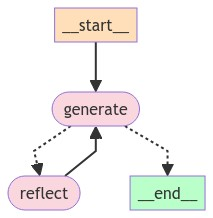

In [8]:
from IPython.display import Image, display

display(Image(graph.get_graph(xray=True).draw_mermaid_png()))

In [9]:
async for event in graph.astream(
    [
        HumanMessage(
            content="미국 패권에 대한 에세이를 작성해줘."
        )
    ],
):
    print(event)
    print("---")

{'generate': AIMessage(content='### 미국 패권: 세계 무대에서의 주도성\n\n미국은 20세기와 21세기 초반을 통틀어 세계 정치, 경제, 군사 분야에서 독보적인 패권 국가로 자리매김했다. 이러한 미국의 주도성은 제2차 세계대전 이후 본격적으로 강화되었으며, 냉전 시기를 거쳐 오늘날까지 지속되고 있다. 이 에세이에서는 미국 패권의 역사적 배경, 경제적 영향, 군사적 주도성, 문화적 확산, 그리고 미래 전망에 대해 논의할 것이다.\n\n미국의 패권은 제2차 세계대전 이후부터 본격적으로 시작되었다. 전쟁의 승리자로서 미국은 유럽과 아시아의 재건을 주도했고, 마셜 플랜과 같은 경제 프로그램을 통해 전 세계에 영향력을 행사했다. 냉전 기간 동안 미국은 소련과의 경쟁에서 승리하며 자유 민주주의와 자본주의를 전 세계에 확산시키는 데 성공했다. 이러한 역사적 배경은 미국이 세계 정치의 중심에 서게 된 중요한 이유 중 하나였다.\n\n경제적 측면에서 미국은 세계 경제를 주도하는 역할을 해왔다. 미국 달러는 사실상 세계의 기축통화로 자리 잡았으며, 월스트리트는 글로벌 금융의 중심지로서 중요한 역할을 담당하고 있다. 또한, 실리콘밸리를 중심으로 한 기술 혁신은 전 세계 경제에 큰 영향을 미쳤다. 이러한 경제적 주도성은 미국이 국제 무역과 금융 시스템에서 중요한 역할을 지속하는 기반이 되고 있다.\n\n군사적인 측면에서도 미국은 독보적인 위치를 차지하고 있다. 세계 최대의 군사 예산을 보유하고 있으며, 전 세계에 군사 기지를 두고 있다. 이는 미국이 국제 안보와 평화 유지의 중심 역할을 맡게 하는 주요 요인이다. 또한, NATO와 같은 군사 동맹을 통해 미국은 전 세계적인 안보 네트워크를 구축하고 있다. 이러한 군사적 주도성은 미국의 패권 유지를 위한 중요한 요소이다.\n\n미국의 문화적 영향력 또한 무시할 수 없다. 할리우드 영화, 팝 음악, 패스트푸드 등 미국의 문화는 전 세계적으로 큰 인기를 끌고 있다. 이러한 문화적 확산은 미국의 소프트 파워를 

In [10]:
ChatPromptTemplate.from_messages([event['generate']]).pretty_print()

================================== Ai Message ==================================

### 미국 패권: 세계 무대에서의 주도성과 도전

미국은 20세기와 21세기 초반을 통틀어 세계 정치, 경제, 군사 분야에서 독보적인 패권 국가로 자리매김했다. 이러한 미국의 주도성은 제2차 세계대전 이후 본격적으로 강화되었으며, 냉전 시기를 거쳐 오늘날까지 지속되고 있다. 이 에세이에서는 미국 패권의 역사적 배경, 경제적 영향, 군사적 주도성, 문화적 확산, 그리고 미래 전망에 대해 논의할 것이다.

미국의 패권은 제2차 세계대전 이후부터 본격적으로 시작되었다. 전쟁의 승리자로서 미국은 유럽과 아시아의 재건을 주도했고, 마셜 플랜과 같은 경제 프로그램을 통해 전 세계에 영향력을 행사했다. 냉전 기간 동안 미국은 소련과의 경쟁에서 승리하며 자유 민주주의와 자본주의를 전 세계에 확산시키는 데 성공했다. 이러한 역사적 배경은 미국이 세계 정치의 중심에 서게 된 중요한 이유 중 하나였다.

경제적 측면에서 미국은 세계 경제를 주도하는 역할을 해왔다. 미국 달러는 사실상 세계의 기축통화로 자리 잡았으며, 월스트리트는 글로벌 금융의 중심지로서 중요한 역할을 담당하고 있다. 또한, 실리콘밸리를 중심으로 한 기술 혁신은 전 세계 경제에 큰 영향을 미쳤다. 예를 들어, 애플, 구글, 페이스북과 같은 대기업들은 글로벌 시장에서 큰 영향력을 행사하고 있다. 그러나 이러한 경제적 주도성에는 부작용도 있다. 미국의 경제적 격차 문제는 심각하며, 이는 사회적 갈등을 불러일으키고 있다. 또한, 국제 무역에서 미국의 보호주의 정책은 다른 국가들과의 긴장을 초래하기도 한다.

경제적 주도성 못지않게 중요한 또 다른 측면은 군사적 주도성이다. 세계 최대의 군사 예산을 보유하고 있으며, 전 세계에 군사 기지를 두고 있다. 이는 미국이 국제 안보와 평화 유지의 중심 역할을 맡게 하는 주요 요인이다. 또한, NATO와 같은 군사 동맹을 통해 미국은 